<h1><center>SSP -- Assignment 2</center></h1>

In [1]:
%config InlineBackend.figure_format = 'retina' 
from math import *
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, show

# 1

In [2]:
x1 = np.arange(0.,3.5,1e-3)
y1 = np.arange(0.,3.5,1e-3)
@np.vectorize
def joint_xy(x,y):
    if y <=x < np.inf:
        if 0. <= y <1.:
            return 1./(e-1.) * np.exp(-(x-2*y))
        else:
            return 0.     
    else:
        return 0.


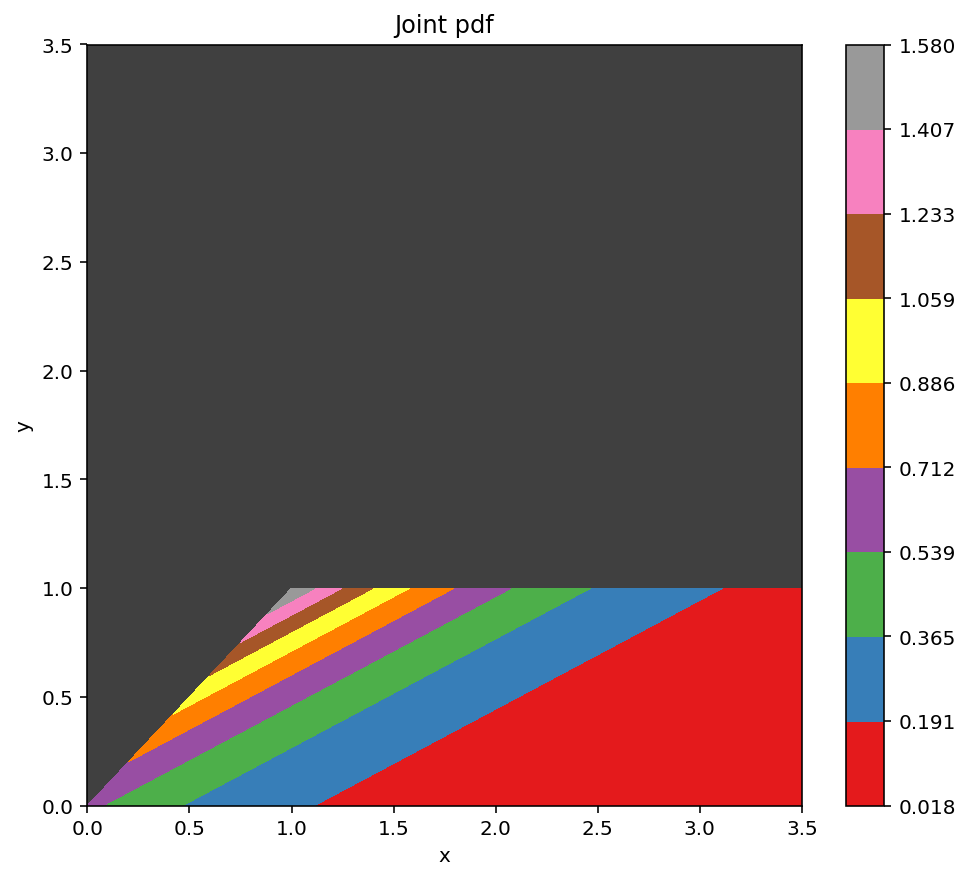

In [3]:
m = np.arange(len(x1))
fig = plt.figure()
fig = figure(figsize=(8,7))
ax = fig.add_subplot(111)
xx1,yy1 = np.meshgrid(x1,y1)
z = joint_xy(xx1,yy1)
z = np.ma.array(z, mask=z < 1e-10)
plt.gca().patch.set_color('.25')
plt.contourf(xx1,yy1,z,cmap='Set1', levels=np.linspace(z.min(),z.max(),10))
plt.title("Joint pdf")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

# 3

$$p(x) = xe^{-x^2/2}$$

## (a)

In [4]:
N = 10000
x3 = np.random.normal(0.,1.,N)
y3 = np.random.normal(0.,1.,N)
z3 = np.sqrt(x3*x3+y3*y3)

In [5]:
def Rayleigh(x):
    return x* np.exp(-x*x/2.)

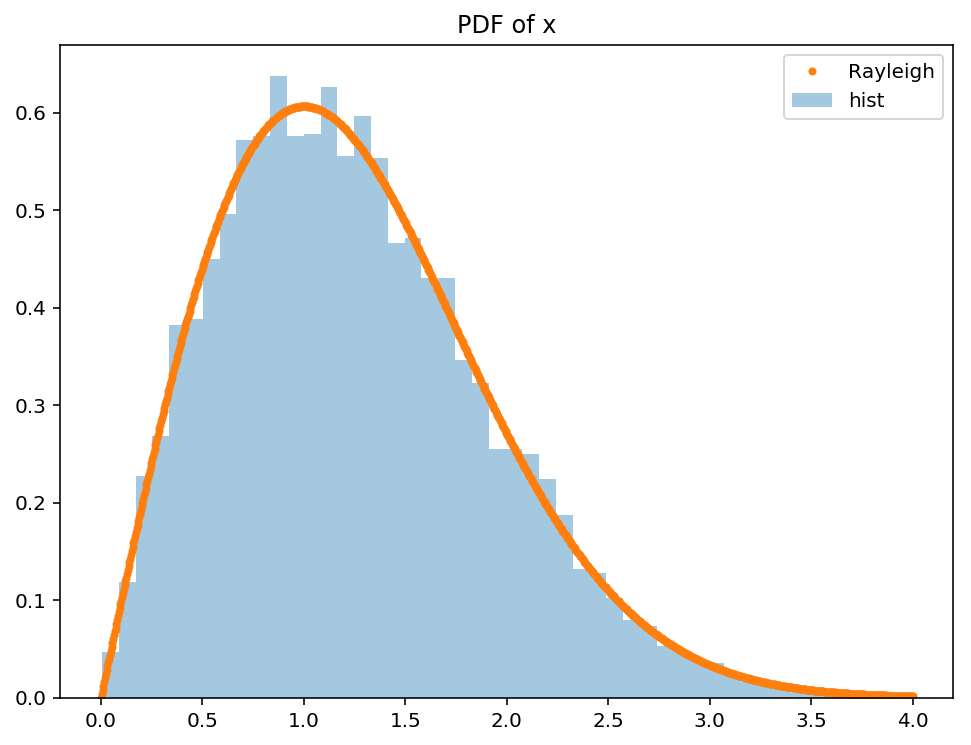

In [6]:
x_plot = np.linspace(0.,4.,1000)
plt.figure(figsize=(8,6))
sns.distplot(z3, kde=False,norm_hist=True,label='hist')
plt.plot(x_plot, Rayleigh(x_plot),'.',zorder=2,label='Rayleigh')
plt.title('PDF of x')
plt.legend()
plt.show()

As can be seen from the above plot, when the sample size is large enough, the pdf of the random deviates can be well represented by Rayleigh distribution.

## (b)

In [7]:
mean = z3.mean()
za = z3-mean
za = np.power(za,3)
zb = z3 - mean
zb = np.power(za,2)
Skew = np.average(za)/(np.average(zb))**(1.5)
print "The skewness of the random deviates z is:", Skew

The skewness of the random deviates z is: 0.101166542714


In [8]:
# Now plot for different N

def mean_skew(n):
    Mean = np.zeros(n);Var = np.zeros(n);Skew = np.zeros(n)
    for i in range(n):
        N = 10 ** (i+1)
        x = np.random.normal(0.,1.,N)
        y = np.random.normal(0.,1.,N)
        z = np.sqrt(x*x+y*y)
        mean = z.mean()
        Mean[i] = mean
        var = np.var(z)
        Var[i] = var
        za = z-mean
        za = np.power(za,3)
        zb = z - mean
        zb = np.power(za,2)
        skew = np.average(za)/(np.average(zb))**(1.5)
        Skew[i] = skew
    return Mean, Var, Skew

    

In [9]:
Mean,Var,Skew = mean_skew(6)
n = np.arange(1,7,1)

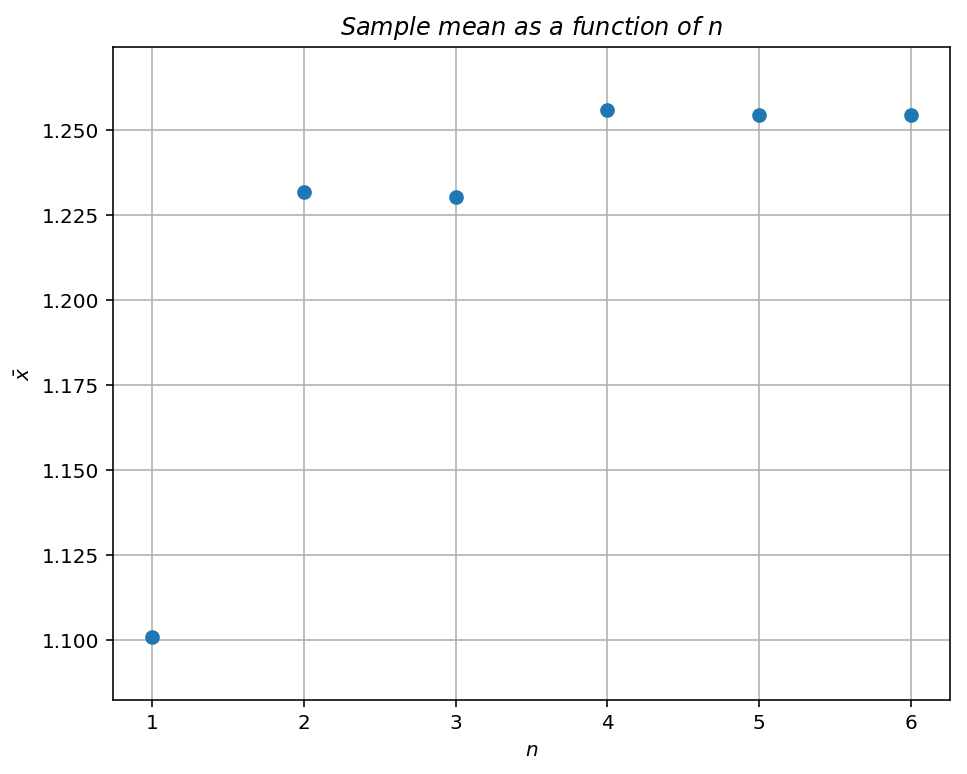

In [10]:
plt.figure(figsize=(7.5,6))
plt.scatter(n,Mean,marker='o',s=40,alpha=1,zorder=2)
plt.title(r"$Sample \ mean \ as \ a \ function \ of \ n$")
plt.xlabel(r'$n$')
plt.ylabel(r'$\bar{x}$')
plt.legend()
plt.grid()
plt.show()

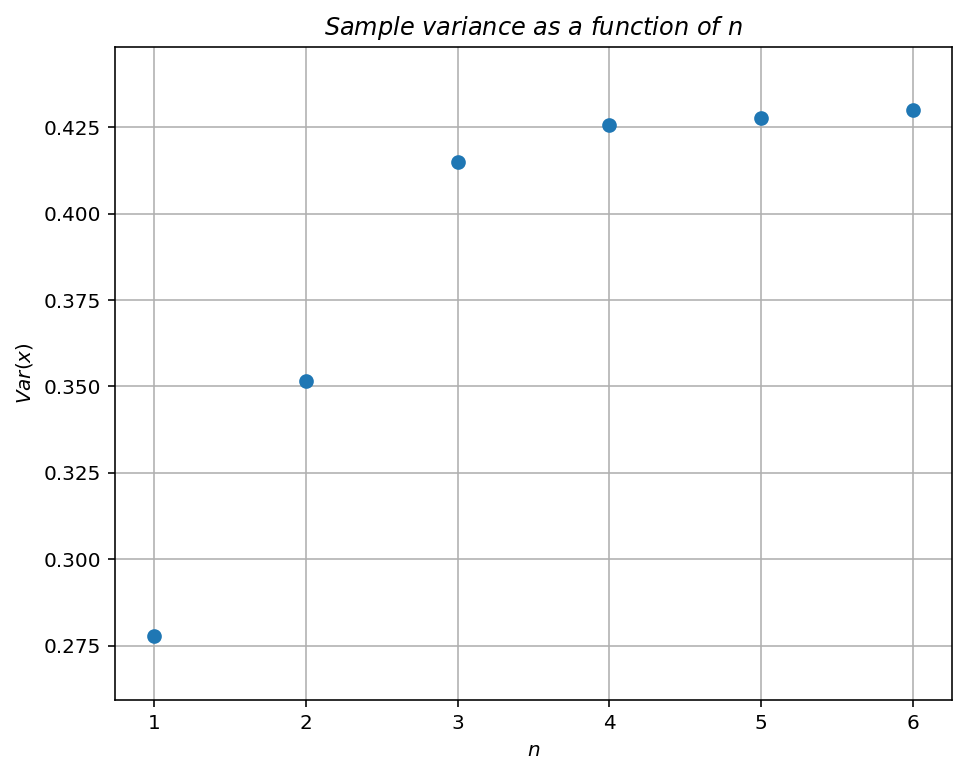

In [11]:
plt.figure(figsize=(7.5,6))
plt.scatter(n,Var,marker='o',s=40,alpha=1,zorder=2)
plt.title(r"$Sample \ variance \ as \ a \ function \ of \ n$")
plt.xlabel(r'$n$')
plt.ylabel(r'$Var(x)$')
plt.legend()
plt.grid()
plt.show()

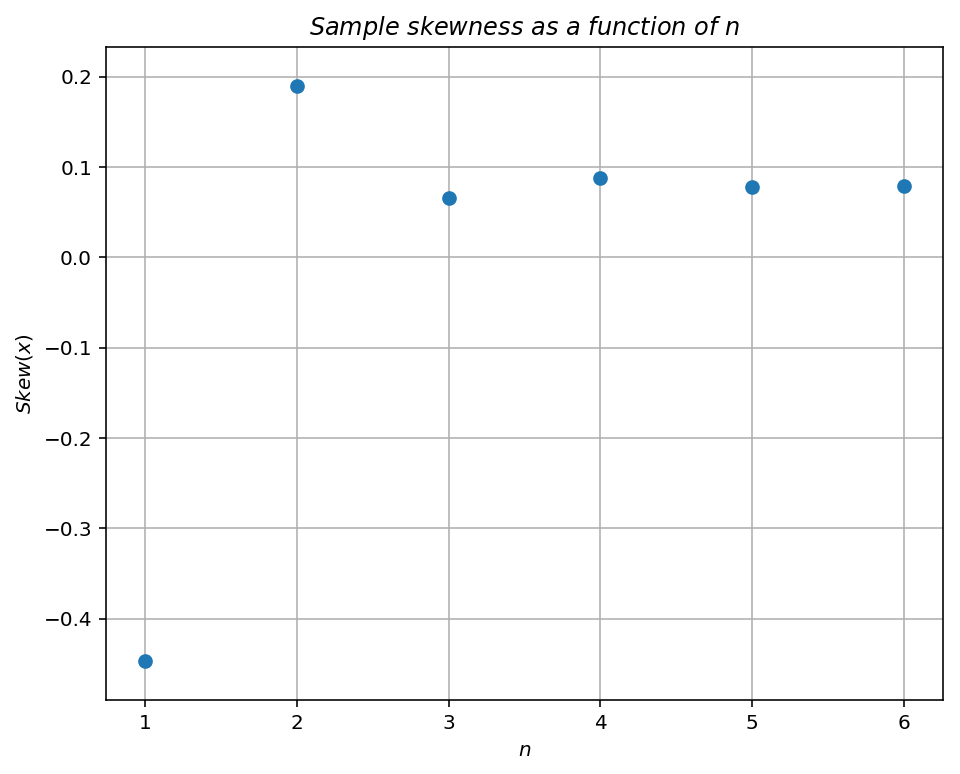

In [12]:
plt.figure(figsize=(7.5,6))
plt.scatter(n,Skew,marker='o',s=40,alpha=1,zorder=2)
plt.title(r"$Sample \ skewness \ as \ a \ function \ of \ n$")
plt.xlabel(r'$n$')
plt.ylabel(r'$Skew(x)$')
plt.legend()
plt.grid()
plt.show()

It can be noted from the three above plots, with an increase in sample size, the mean of the random deviates asymptotes to $\sim 1.25$, while the variance and skewness asymptote to $\sim 0.43$ and $0.08$, respectively.

# 4

In [13]:
from scipy.fftpack import fft
################################    Analytical function    ###################################
@np.vectorize
def f(x):
    if -1.<=x<=1.:
        return 1.
    else:
        return 0.
    
#analytical function
@np.vectorize
def sinc(x):
    return sin(2*pi*x)/(pi*x)

scale = 4.
x = np.linspace(-scale,scale,1000)
y = f(x)

#FFT y
###############################    FFT function    ###########################################
import scipy.fftpack as fft
#Define number of points and time/freq arrays
npts = int(scale)**12
time_array = np.linspace(-scale, scale, npts)
freq_array = fft.fftshift(fft.fftfreq(len(time_array), time_array[1]-time_array[0]))

#Define a rectangular pulse
pulse = np.zeros(npts)
pulse_width = int(npts/scale)
pulse[npts/2 - pulse_width/2:npts/2 + pulse_width/2] = 1

#Shift the pulse so that the function is symmetrical about origin
shifted_pulse = fft.fftshift(pulse)

#Calculate the fourier transform of the shifted pulse
pulse_frequencies = fft.fftshift(fft.fft(shifted_pulse))/npts*scale*2



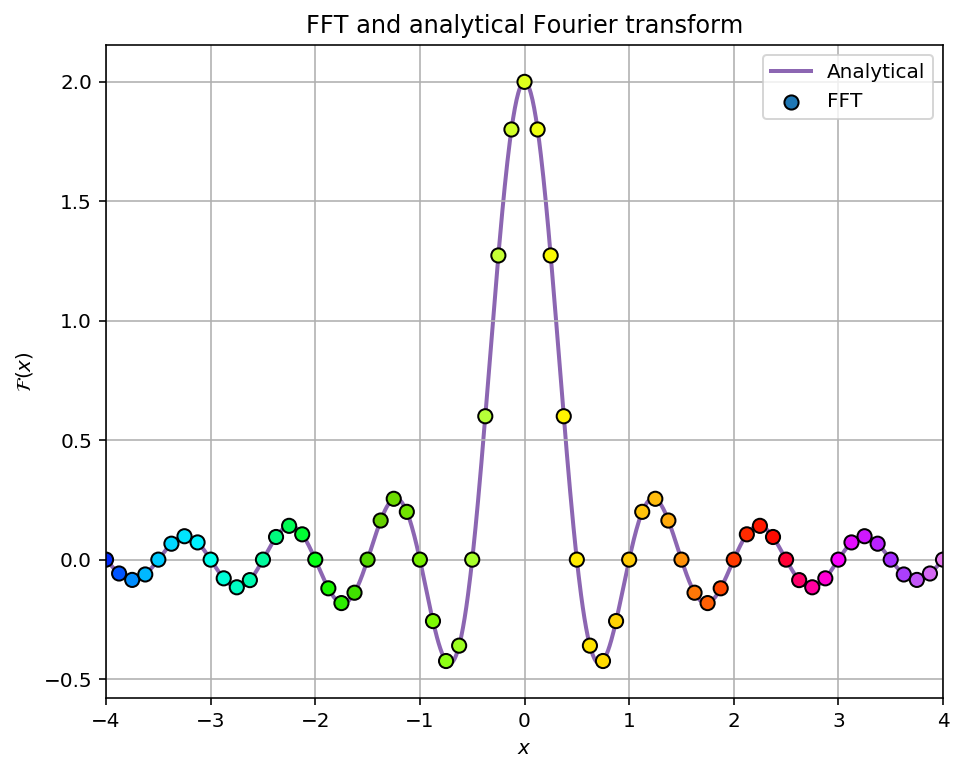

In [14]:
#plot the two results for comparison
ind1 = np.argmin(np.abs(freq_array+4))
ind2 = np.argmin(np.abs(freq_array-4))
m = np.arange(len(freq_array[ind1-10:ind2+10]))
plt.figure(figsize=(7.5,6))
plt.plot(x,sinc(x),lw=2,zorder=1,color='rebeccapurple',alpha=.75,label='Analytical')
plt.scatter(freq_array[ind1-10:ind2+10], np.real(pulse_frequencies[ind1-10:ind2+10]), marker='o',edgecolors = 'k',s=50,c=m,cmap='gist_ncar',alpha=1, zorder=2,label='FFT')
plt.xlim([-4,4])
plt.title("FFT and analytical Fourier transform")
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathcal{F}(x)$')
plt.legend()
plt.grid()
plt.show()

# 5

In [15]:
from scipy import signal
N = 40
sig = signal.unit_impulse(N,2)
win = signal.gaussian(N,1,sym=True)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

/Users/tardis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


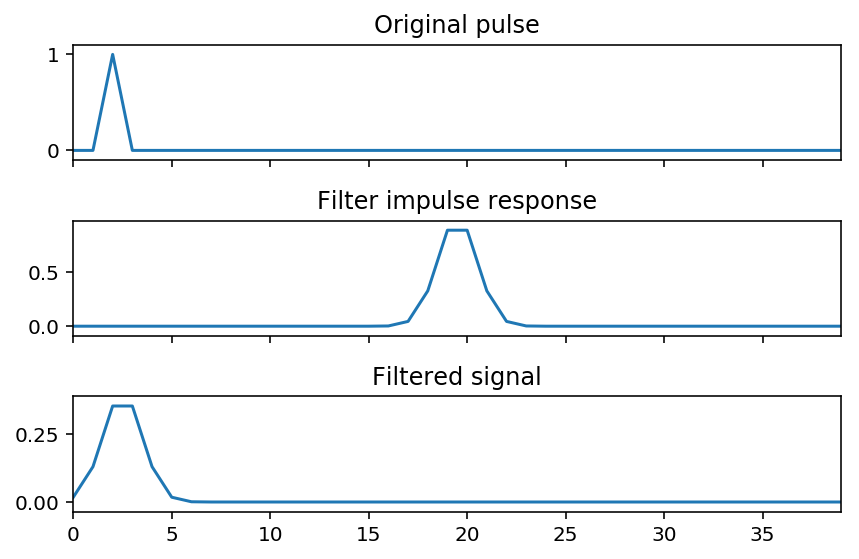

In [16]:
%matplotlib inline
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

The above plot is in good agreement with the analytical solution.